In [1]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Netflix_Appetency_Prediction

/content/drive/MyDrive/Netflix_Appetency_Prediction


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df=pd.read_csv('train.csv')

In [5]:
test_df=pd.read_csv('test.csv')

In [6]:
id_list=test_df['id']

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 509 entries, id to feature_506
dtypes: float64(143), int64(274), object(92)
memory usage: 271.8+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 508 entries, id to feature_506
dtypes: float64(143), int64(273), object(92)
memory usage: 116.3+ MB


#1.Find categorical variables and numerical variables

In [9]:
categorical_var=[column for column in train_df.columns if (train_df[column].dtype=='object') | (len(train_df[column].unique())<=20) ]

In [10]:
numerical_var=train_df.columns.drop(categorical_var)

In [11]:
print("categorical_var length:", len(categorical_var), '\n'\
      "numerical_var length:", len(numerical_var))

categorical_var length: 361 
numerical_var length: 148


#2.Read target feature

In [12]:
train_df['target'].unique()

array([0, 1])

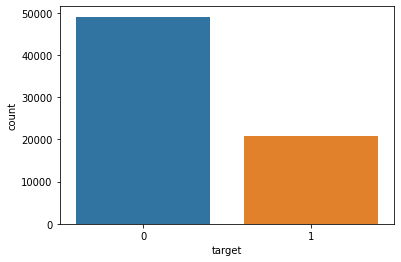

In [13]:
sns.countplot(train_df['target'])

#3.Observe percentage null values

Text(0.5, 0, 'percentage null values')

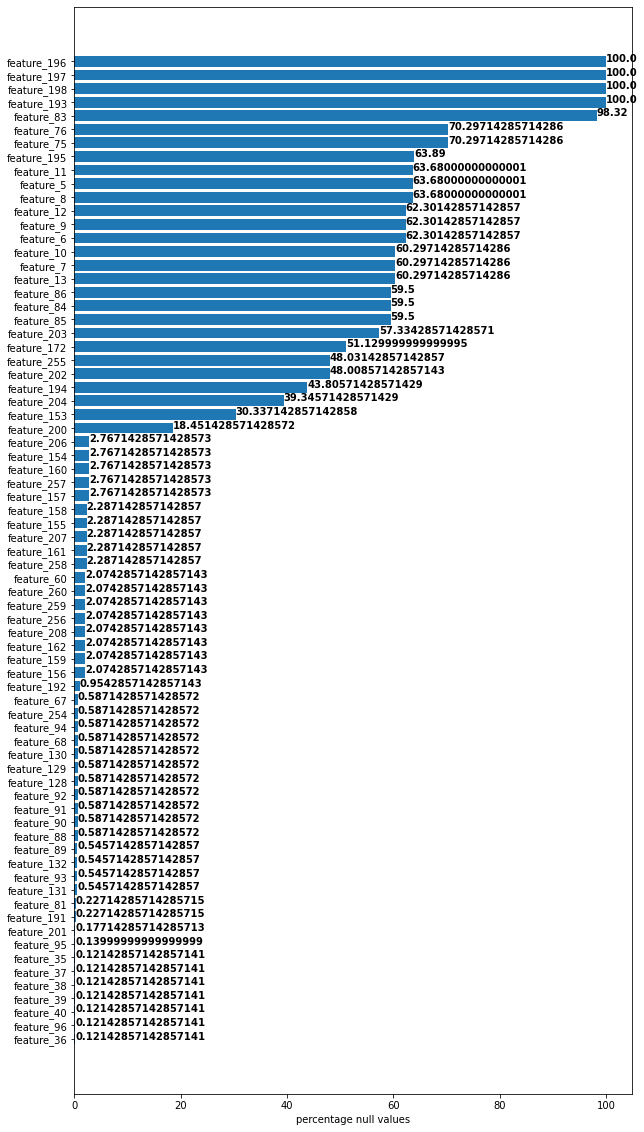

In [14]:
null_values_columns=[]
percent_null_values=[]
for column in train_df.columns:
    percent_null_value=((train_df[column].isna().sum())/(len(train_df))) * 100
    if(percent_null_value > 0):
        null_values_columns.append(column)
        percent_null_values.append(percent_null_value)
df_null=pd.DataFrame(null_values_columns,columns=['column'])
df_null['percent_null_values']=percent_null_values
df_null.sort_values('percent_null_values',inplace=True)


plt.figure(figsize=(10,20))
plt.barh(df_null['column'],df_null['percent_null_values'])

for i, v in enumerate(df_null['percent_null_values']):
    plt.text(v, i, str(v), color='black', fontweight='bold')

plt.xlabel('percentage null values')
#     print(f'the percentage null values in column {column} is {((train_df[column].isna().sum())/(len(train_df))) * 100} %')


#4.Drop columns which have zero variance (or only one class)

In [15]:
def zero_var(df1):
    zero_var_columns=[]
    for column in df1.columns:
        if(len(df1[column].unique())==1):
            zero_var_columns.append(column)
    return zero_var_columns

In [16]:
zero_var_columns=zero_var(train_df)

In [17]:
print("Zero variance columns:", len(zero_var_columns))

Zero variance columns: 63


In [18]:
# many columns have zero variance, we will delete these while data cleaning

# correlation among the features

In [19]:
df_corr=train_df.corr()

# Data preprocessing

In [20]:
# making a new copy so that the original data set remains unchanged
df=train_df.copy()

In [21]:
df.shape

(70000, 509)

In [22]:
# removing id column
df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

# Handle case about day, month and year

In [23]:
#there are some date columns , lets convert them into different columns of day , month and year

In [24]:
def new_month_column(df2):
    return df2.month
def new_year_column(df2):
    return df2.year
def new_day_column(df2):
    return df2.day

In [25]:
def date_change(df1):
    df1[['feature_191','feature_192','feature_199','feature_201']]=df1[['feature_191','feature_192','feature_199','feature_201']].astype('datetime64')
    for column in ['feature_191','feature_192','feature_199','feature_201']:
        df1[column+'_day']=df1[column].apply(new_day_column)
        df1[column+'_month']=df1[column].apply(new_month_column)
        df1[column+'_year']=df1[column].apply(new_year_column)
    df1.drop(['feature_191','feature_192','feature_199','feature_201'],axis=1,inplace=True)
    return df1

In [26]:
date_change(df)
date_change(test_df)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_191_year,feature_192_day,feature_192_month,feature_192_year,feature_199_day,feature_199_month,feature_199_year,feature_201_day,feature_201_month,feature_201_year
0,C0,C0,C0,C5,C2,37.638,36.361667,42.688333,31.66,31.660000,...,2017.0,1.0,9.0,2017.0,1,9,2017,1.0,9.0,2017.0
1,C0,C0,C3,C5,C11,32.540,32.540000,39.403333,30.82,30.820000,...,2017.0,8.0,1.0,2017.0,8,1,2017,8.0,1.0,2017.0
2,C0,C0,C1,C5,C1,NaN,NaN,NaN,NaN,NaN,...,2017.0,10.0,3.0,2017.0,10,3,2017,10.0,3.0,2017.0
3,C0,C0,C3,C5,C2,NaN,NaN,NaN,NaN,NaN,...,2013.0,27.0,1.0,2015.0,27,1,2015,27.0,1.0,2015.0
4,C0,C0,C1,C5,C10,NaN,NaN,NaN,NaN,NaN,...,2017.0,23.0,1.0,2017.0,23,1,2017,23.0,1.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C0,C0,C3,C5,C7,NaN,NaN,NaN,NaN,NaN,...,2002.0,24.0,8.0,2013.0,6,1,2016,17.0,12.0,2015.0
29996,C0,C0,C2,C5,C1,NaN,NaN,NaN,NaN,NaN,...,2016.0,3.0,4.0,2016.0,3,4,2016,3.0,4.0,2016.0
29997,C0,C0,C4,C2,C2,44.320,44.320000,43.959000,42.49,42.490000,...,2008.0,19.0,2.0,2014.0,11,8,2016,11.0,8.0,2016.0
29998,C0,C0,C0,C5,C11,45.660,44.223333,42.346667,44.13,42.693333,...,2013.0,NaN,NaN,NaN,6,6,2017,18.0,4.0,2014.0


# Data cleaning

## 1. Dropping columns with very large no, of null values (greater than 10%)

In [27]:
print("Null value length:", len(df_null))

Null value length: 73


In [28]:
large_null_columns=df_null[df_null['percent_null_values']>10]['column'].values

In [29]:
large_null_columns

array(['feature_200', 'feature_153', 'feature_204', 'feature_194',
       'feature_202', 'feature_255', 'feature_172', 'feature_203',
       'feature_85', 'feature_84', 'feature_86', 'feature_13',
       'feature_7', 'feature_10', 'feature_6', 'feature_9', 'feature_12',
       'feature_8', 'feature_5', 'feature_11', 'feature_195',
       'feature_75', 'feature_76', 'feature_83', 'feature_193',
       'feature_198', 'feature_197', 'feature_196'], dtype=object)

In [30]:
df.drop(large_null_columns,axis=1,inplace=True)
test_df.drop(large_null_columns,axis=1,inplace=True)

In [31]:
df.shape

(70000, 488)

In [32]:
test_df.shape

(30000, 487)

Text(0.5, 0, 'percentage null values')

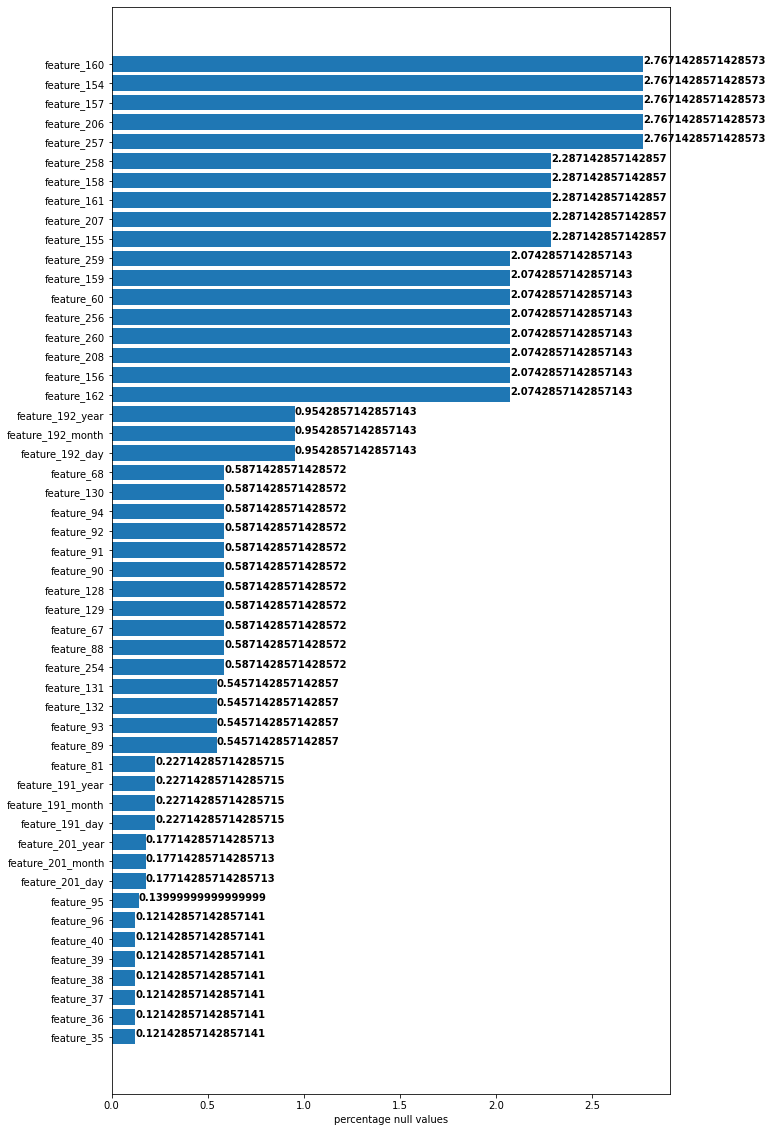

In [33]:
null_values_columns=[]
percent_null_values=[]
for column in df.columns:
    percent_null_value=((df[column].isna().sum())/(len(df))) * 100
    if(percent_null_value > 0):
        null_values_columns.append(column)
        percent_null_values.append(percent_null_value)
df_null=pd.DataFrame(null_values_columns,columns=['column'])
df_null['percent_null_values']=percent_null_values
df_null.sort_values('percent_null_values',inplace=True)


plt.figure(figsize=(10,20))
plt.barh(df_null['column'],df_null['percent_null_values'])

for i, v in enumerate(df_null['percent_null_values']):
    plt.text(v, i, str(v), color='black', fontweight='bold')

plt.xlabel('percentage null values')

In [34]:
# successfully dropped the columns with large no. of na values

# 2. deleting columns with high correlation

In [35]:
# deleting the columns with high correlation

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    return col_corr

In [36]:
high_corr_deleted=correlation(df,0.90)

In [37]:
test_df.drop(high_corr_deleted,axis=1,inplace=True)

In [38]:
print("high_corr_deleted length:", len(high_corr_deleted))

high_corr_deleted length: 121


In [39]:
df.shape

(70000, 367)

In [40]:
df.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,feature_17,...,feature_191_month,feature_192_day,feature_192_month,feature_192_year,feature_199_day,feature_199_month,feature_199_year,feature_201_day,feature_201_month,feature_201_year
0,0,C0,C0,C1,C5,C11,0.0,0.000,C0,C60,...,11.0,10.0,11.0,2017.0,10,11,2017,10.0,11.0,2017.0
1,0,C0,C0,C3,C5,C1,0.0,0.000,C2,C50,...,3.0,25.0,3.0,2015.0,4,2,2017,25.0,3.0,2015.0
2,0,C0,C0,C3,C5,C2,0.0,0.000,C1,C76,...,1.0,27.0,1.0,2015.0,24,3,2016,27.0,1.0,2015.0
3,0,C0,C0,C1,C5,C1,0.0,0.000,C0,C58,...,5.0,4.0,1.0,2014.0,4,1,2014,4.0,1.0,2014.0
4,1,C0,C0,C3,C3,C11,0.0,0.258,C2,C48,...,7.0,9.0,10.0,2013.0,9,10,2013,9.0,10.0,2013.0


# 3. Deleting columns with zero variance

In [41]:
# many columns have zero variance, we will delete these while data cleaning
def zero_var(df1):
    zero_var_columns=[]
    for column in df1.columns:
        if(len(df1[column].unique())==1):
            df1.drop(column, axis=1, inplace=True)
            zero_var_columns.append(column)
    return zero_var_columns

zero_var_columns=zero_var(df)

In [42]:
print("zero_var_columns length:", len(zero_var_columns))

zero_var_columns length: 59


In [43]:
test_df.drop(zero_var_columns,axis=1,inplace=True)

In [44]:
df.shape

(70000, 308)

In [45]:
test_df.shape

(30000, 307)

#4.Handle categorical variables

In [46]:
categorical_var=[column for column in df.columns if (df[column].dtype=='object')]
numerical_var=df.columns.drop(categorical_var)

In [47]:
df[categorical_var].head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_16,feature_17,feature_18,feature_19,feature_20,...,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_336,feature_337,feature_338,feature_371
0,C0,C0,C1,C5,C11,C0,C60,C17795,C413,C3620,...,C130,C46,C22,C10,C7,C6,C0,C0,C0,C0
1,C0,C0,C3,C5,C1,C2,C50,C14050,C413,C2819,...,C105,C36,C18,C6,C3,C2,C0,C0,C0,C0
2,C0,C0,C3,C5,C2,C1,C76,C23471,C413,C4794,...,C105,C36,C18,C6,C3,C2,C0,C0,C0,C0
3,C0,C0,C1,C5,C1,C0,C58,C16929,C413,C3344,...,C83,C28,C13,C2,C1,C0,C0,C0,C0,C0
4,C0,C0,C3,C3,C11,C2,C48,C13941,C413,C2753,...,C93,C24,C11,C2,C1,C0,C0,C0,C0,C1


In [48]:
# lets manually examine some categorical variables

In [49]:
for column in categorical_var:
  print(column,' = ',len(df[column].unique()),'\t')

feature_0  =  2 	
feature_1  =  2 	
feature_2  =  6 	
feature_3  =  6 	
feature_4  =  12 	
feature_16  =  4 	
feature_17  =  103 	
feature_18  =  15858 	
feature_19  =  260 	
feature_20  =  5841 	
feature_21  =  2327 	
feature_22  =  2339 	
feature_23  =  2 	
feature_24  =  25 	
feature_27  =  2 	
feature_28  =  2 	
feature_29  =  2 	
feature_30  =  2 	
feature_31  =  2 	
feature_32  =  2 	
feature_33  =  2 	
feature_34  =  2 	
feature_41  =  2 	
feature_42  =  2 	
feature_54  =  260 	
feature_58  =  5 	
feature_97  =  29 	
feature_133  =  7126 	
feature_134  =  3 	
feature_135  =  13 	
feature_152  =  2 	
feature_163  =  4 	
feature_164  =  4 	
feature_165  =  12 	
feature_185  =  255 	
feature_186  =  13 	
feature_189  =  21 	
feature_205  =  10 	
feature_239  =  2 	
feature_240  =  3 	
feature_241  =  3 	
feature_242  =  2 	
feature_243  =  15 	
feature_244  =  4 	
feature_246  =  147 	
feature_247  =  86 	
feature_250  =  2 	
feature_251  =  6 	
feature_270  =  2 	
feature_271  =  

##dropping categorical columns having too many classes

In [50]:
# removing the categorical columns with more than 80 classes

In [51]:
def remove_more_than_80(df2):
    removed_columns_80=[]
    for column in categorical_var:
        if(len(df[column].unique())>70):
            df2.drop(column, axis=1, inplace=True)
#             categorical_var.remove(column)
            removed_columns_80.append(column)
    print('removed columns are:\n',removed_columns_80)
    return removed_columns_80

In [52]:
removed_columns_80=remove_more_than_80(df)

removed columns are:
 ['feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_54', 'feature_133', 'feature_185', 'feature_246', 'feature_247', 'feature_271', 'feature_272', 'feature_279', 'feature_280', 'feature_287', 'feature_288']


In [53]:
test_df.drop(removed_columns_80,axis=1,inplace=True)

In [54]:
print("categorical_var length:", categorical_var)

categorical_var length: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_41', 'feature_42', 'feature_54', 'feature_58', 'feature_97', 'feature_133', 'feature_134', 'feature_135', 'feature_152', 'feature_163', 'feature_164', 'feature_165', 'feature_185', 'feature_186', 'feature_189', 'feature_205', 'feature_239', 'feature_240', 'feature_241', 'feature_242', 'feature_243', 'feature_244', 'feature_246', 'feature_247', 'feature_250', 'feature_251', 'feature_270', 'feature_271', 'feature_272', 'feature_273', 'feature_274', 'feature_275', 'feature_276', 'feature_277', 'feature_278', 'feature_279', 'feature_280', 'feature_281', 'feature_282', 'feature_283', 'feature_284', 'feature_285', 'feature_286', 'feature_287', 'feature_288', 'f

In [55]:
new_categorical_var = [feature for feature in categorical_var if feature not in removed_columns_80]

In [57]:
df.shape

(70000, 291)

In [58]:
test_df.shape

(30000, 290)

In [59]:
df.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,feature_23,...,feature_191_month,feature_192_day,feature_192_month,feature_192_year,feature_199_day,feature_199_month,feature_199_year,feature_201_day,feature_201_month,feature_201_year
0,0,C0,C0,C1,C5,C11,0.0,0.000,C0,C0,...,11.0,10.0,11.0,2017.0,10,11,2017,10.0,11.0,2017.0
1,0,C0,C0,C3,C5,C1,0.0,0.000,C2,C0,...,3.0,25.0,3.0,2015.0,4,2,2017,25.0,3.0,2015.0
2,0,C0,C0,C3,C5,C2,0.0,0.000,C1,C0,...,1.0,27.0,1.0,2015.0,24,3,2016,27.0,1.0,2015.0
3,0,C0,C0,C1,C5,C1,0.0,0.000,C0,C0,...,5.0,4.0,1.0,2014.0,4,1,2014,4.0,1.0,2014.0
4,1,C0,C0,C3,C3,C11,0.0,0.258,C2,C0,...,7.0,9.0,10.0,2013.0,9,10,2013,9.0,10.0,2013.0


#5.label encoding 

In [60]:
def label_encoding(df1,df2):
    le=LabelEncoder()
    new=le.fit_transform(df1)
    
    df2.loc[~df2.isin(le.classes_)] = -1    
    df2.loc[df2.isin(le.classes_)] = le.transform(df2[df2.isin(le.classes_)])
   
    # new_test=le.transform(df2)
    return new,df2

In [61]:
# le_models=[]
for column in new_categorical_var:
    new,new_test=label_encoding(df[column],test_df[column])
    df[column]=new
    test_df[column]=new_test

In [62]:
df.head()

,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,feature_23,...,feature_191_month,feature_192_day,feature_192_month,feature_192_year,feature_199_day,feature_199_month,feature_199_year,feature_201_day,feature_201_month,feature_201_year
0,0,0,0,1,5,3,0.0,0.000,0,0,...,11.0,10.0,11.0,2017.0,10,11,2017,10.0,11.0,2017.0
1,0,0,0,3,5,1,0.0,0.000,2,0,...,3.0,25.0,3.0,2015.0,4,2,2017,25.0,3.0,2015.0
2,0,0,0,3,5,4,0.0,0.000,1,0,...,1.0,27.0,1.0,2015.0,24,3,2016,27.0,1.0,2015.0
3,0,0,0,1,5,1,0.0,0.000,0,0,...,5.0,4.0,1.0,2014.0,4,1,2014,4.0,1.0,2014.0
4,1,0,0,3,3,3,0.0,0.258,2,0,...,7.0,9.0,10.0,2013.0,9,10,2013,9.0,10.0,2013.0


In [63]:
test_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_14,feature_15,feature_16,feature_23,feature_24,...,feature_191_month,feature_192_day,feature_192_month,feature_192_year,feature_199_day,feature_199_month,feature_199_year,feature_201_day,feature_201_month,feature_201_year
0,0,0,0,5,4,1.758,15.018333,0,0,19,...,9.0,1.0,9.0,2017.0,1,9,2017,1.0,9.0,2017.0
1,0,0,3,5,3,0.000,0.000000,0,0,14,...,1.0,8.0,1.0,2017.0,8,1,2017,8.0,1.0,2017.0
2,0,0,1,5,1,0.000,0.000000,0,0,8,...,3.0,10.0,3.0,2017.0,10,3,2017,10.0,3.0,2017.0
3,0,0,3,5,4,0.000,0.000000,0,0,10,...,11.0,27.0,1.0,2015.0,27,1,2015,27.0,1.0,2015.0
4,0,0,1,5,2,0.000,0.000000,1,0,8,...,1.0,23.0,1.0,2017.0,23,1,2017,23.0,1.0,2017.0


#6.filling na values with -1 

In [64]:
df.fillna(-1,inplace=True)
test_df.fillna(-1,inplace=True)

In [66]:
X_train=df.drop('target',axis=1)
y_train=df['target']

In [67]:
columns_with_na=[column for column in X_train.columns if X_train[column].isna().sum()>0]

In [68]:
columns_with_na

[]

In [69]:
# no na values now

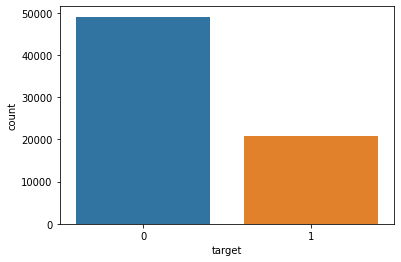

In [70]:
sns.countplot(df['target'])

#7.Train the model with XGBoost Classifier

In [71]:
df.drop('target',axis=1).shape

(70000, 290)

In [72]:
X_train.shape

(70000, 290)

In [73]:
test_df.shape

(30000, 290)

In [74]:
from xgboost import XGBClassifier

In [101]:
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='auc')

In [102]:
xgboost_model.fit(X_train, y_train, verbose=False)

XGBClassifier(eval_metric='auc', use_label_encoder=False)

In [103]:
xgboost_pred = xgboost_model.predict(test_df)

In [78]:
xgboost_pred

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
len(xgboost_pred)

30000

In [105]:
id_list[0]

5

In [81]:
import csv

In [106]:
with open('XGBoost_auc_submission.csv', 'w') as fp:
  writer = csv.writer(fp)
  writer.writerow(['id', 'target'])
  for i in range(len(xgboost_pred)):
    writer.writerow([id_list[i], xgboost_pred[i]])